### STEP1: EDA


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Load the CSV file
file_path = r'C:\Users\91766\fraud.csv'
df = pd.read_csv(file_path)

In [3]:
df.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

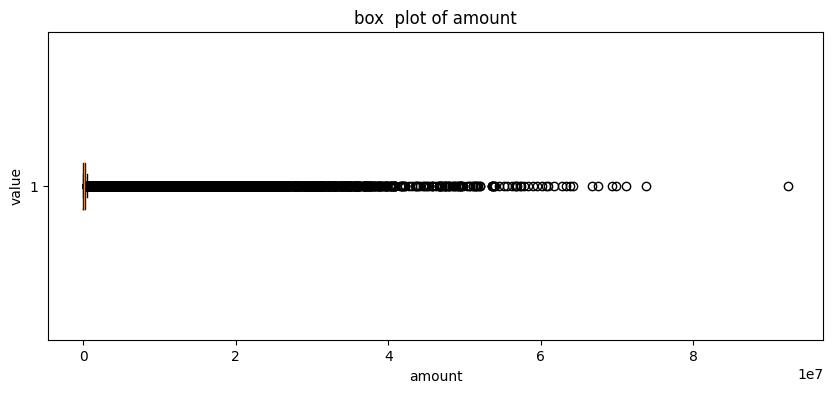

In [8]:
#checink for outliers
#box plot
plt.figure(figsize=(10,4))
plt.boxplot(df['amount'],vert=False)

plt.xlabel("amount")
plt.ylabel("value")
plt.title("box  plot of amount")

plt.show()

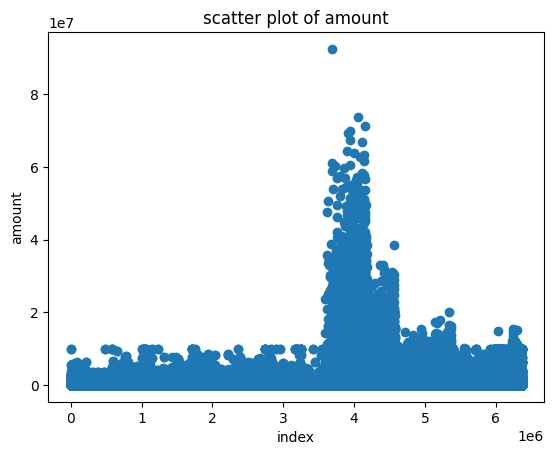

In [9]:
#scatter plot 
plt.scatter(df.index,df['amount'])

plt.xlabel('index')
plt.ylabel("amount")
plt.title("scatter plot of amount")

plt.show()

In [10]:
#find outliers usinf iqr methord 

Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3-Q1 
lower_bound = Q1-1.5 *IQR
higher_bound = Q3-1.5 *IQR 

outlier = df[(df['amount']<lower_bound) | (df['amount']>higher_bound)]

outlier.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
outlier.shape

(6362620, 11)

In [12]:
print(len(outlier[outlier.isFraud ==1]))

8213


In [13]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percentage  = (legit/(fraud+legit)*100)
fraud_percentage  = (fraud/(fraud+legit)*100)

print("number of legit trancaction: ", legit)
print("number of fraud trancaction: ", fraud)
print("percentage of legit trancaction:  {:.4f}%".format(legit_percentage))
print("percentage of fraud trancaction:  {:.4f}%".format(fraud_percentage))


number of legit trancaction:  6354407
number of fraud trancaction:  8213
percentage of legit trancaction:  99.8709%
percentage of fraud trancaction:  0.1291%


In [14]:
#

clearly this is a highly imbalanced dataset ,removing outiliers or average out  the outliers may make the  model biased ,thats the the reaosn we keep the outliers 

### visualization 

([<matplotlib.patches.Wedge at 0x223bd2cfca0>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.8709%'),
  Text(0.599995066874818, -0.002433048680711153, '0.1291%')])

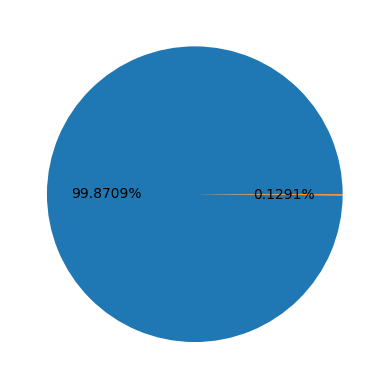

In [15]:
plt.pie(df['isFraud'].value_counts(),autopct='%.4f%%')

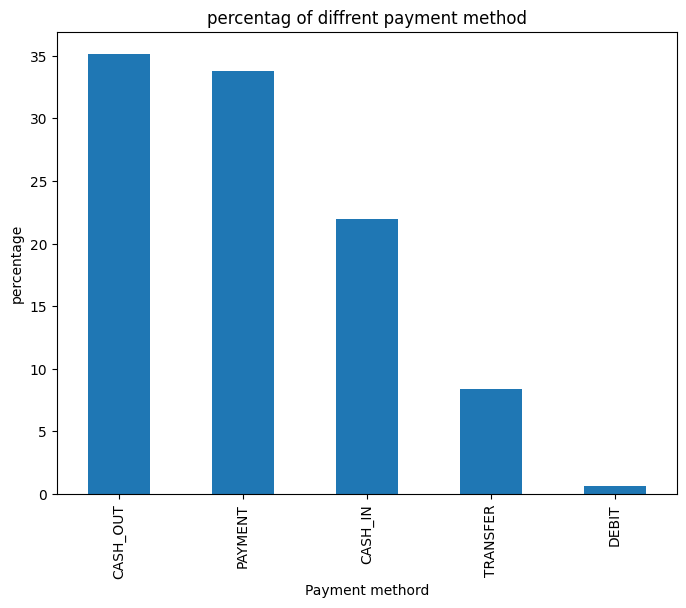

In [16]:


payment_count = df['type'].value_counts()
payment_percentage = (payment_count/payment_count.sum())*100

plt.figure(figsize=(8,6))
payment_percentage.plot(kind='bar')

plt.xlabel('Payment methord')
plt.ylabel('percentage')
plt.title('percentag of diffrent payment method')

plt.show()

type
CASH_OUT    50.11567
TRANSFER    49.88433
Name: count, dtype: float64


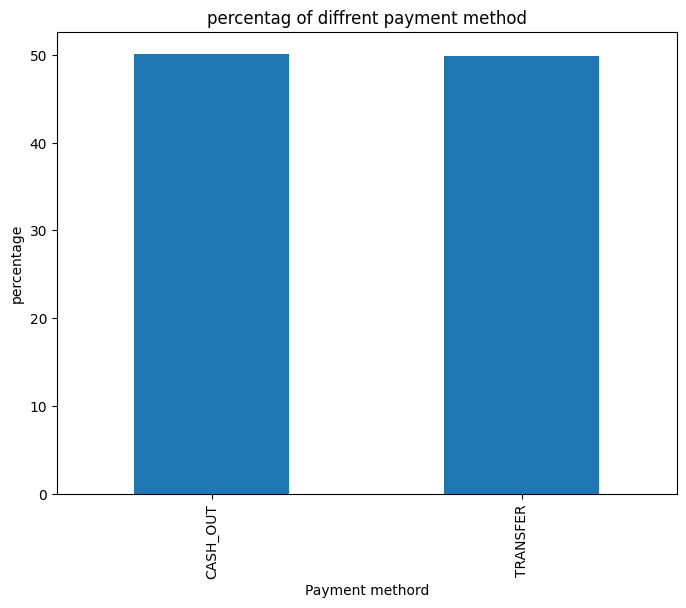

In [17]:
fraud_df = df[df['isFraud'] == 1]
legit_df = df[df['isFraud']==0]

payment_count_fraud = fraud_df['type'].value_counts()
payment_percentage_fraud = (payment_count_fraud/payment_count_fraud.sum())*100

print(payment_percentage_fraud)
plt.figure(figsize=(8,6))
payment_percentage_fraud.plot(kind='bar')


plt.xlabel('Payment methord')
plt.ylabel('percentage')
plt.title('percentag of diffrent payment method')

plt.show()

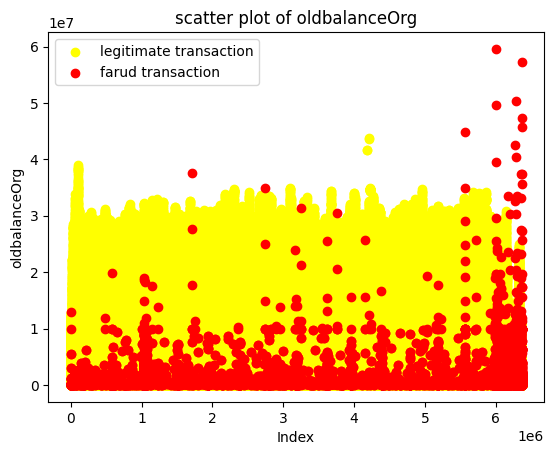

In [18]:
plt.scatter(legit_df.index,legit_df['oldbalanceOrg'], color = 'yellow',label = 'legitimate transaction')
plt.scatter(fraud_df.index,fraud_df['oldbalanceOrg'], color = 'red',label = 'farud transaction')

plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')
plt.title('scatter plot of oldbalanceOrg')

plt.legend()
plt.show()


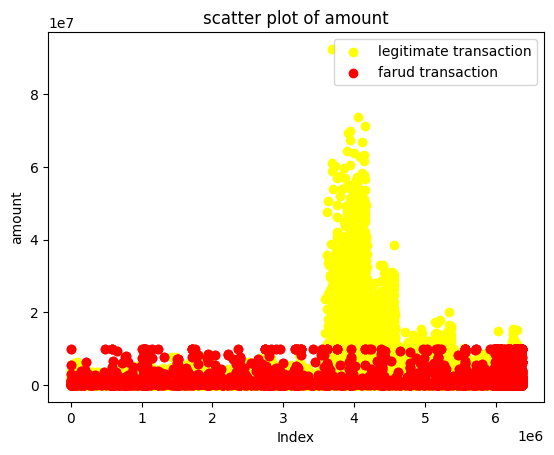

In [19]:
plt.scatter(legit_df.index,legit_df['amount'], color = 'yellow',label = 'legitimate transaction')
plt.scatter(fraud_df.index,fraud_df['amount'], color = 'red',label = 'farud transaction')

plt.xlabel('Index')
plt.ylabel('amount')
plt.title('scatter plot of amount')

plt.legend()
plt.show()

data preprocessing

In [20]:
new_df = df.copy()
new_df.tail(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [21]:
objList = new_df.select_dtypes(include='object').columns
print(objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


converting ctaogrical values into int with label encoder

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in objList:
    new_df[i]= label_encoder.fit_transform(new_df[i].astype(str))

print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


multicolinearity

<AxesSubplot: >

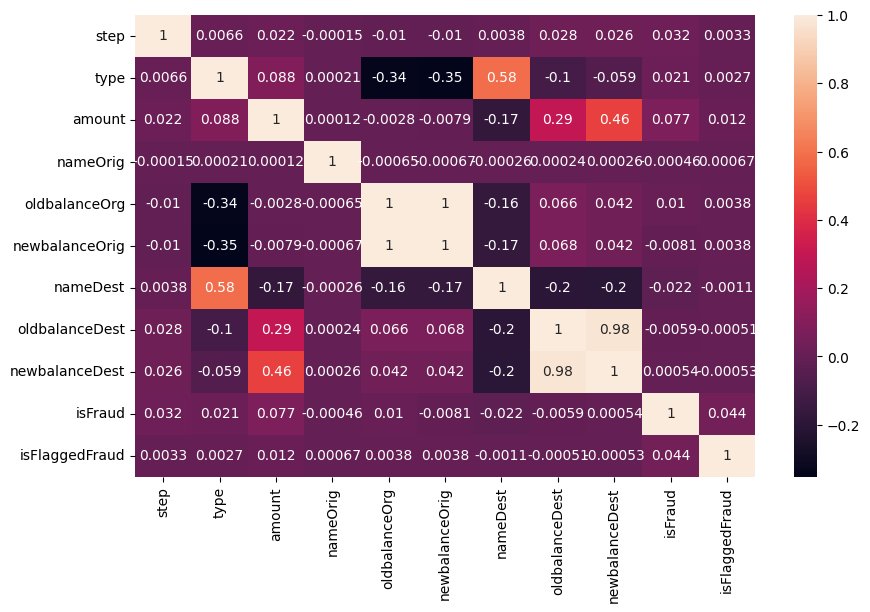

In [23]:
corr = new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [24]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
#calculating vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] =[variance_inflation_factor(df.values,i) for  i in range(df.shape[1])]

    return(vif)
calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [26]:
new_df['amount_orig']=new_df.apply(lambda x: x['oldbalanceOrg']- x['newbalanceOrig'],axis=1)
new_df['amount_dest']=new_df.apply(lambda x: x['newbalanceDest']- x['oldbalanceDest'],axis=1)

# Dropping unnecessary columns
new_df = new_df.drop(['oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'newbalanceDest', 'nameDest', 'nameOrig'], axis=1)

calc_vif(new_df)

,variables,VIF
0,step,2.089916
1,type,2.039328
2,amount,3.883383
3,isFraud,1.187909
4,isFlaggedFraud,1.002535
5,amount_orig,1.293306
6,amount_dest,3.774030


<AxesSubplot: >

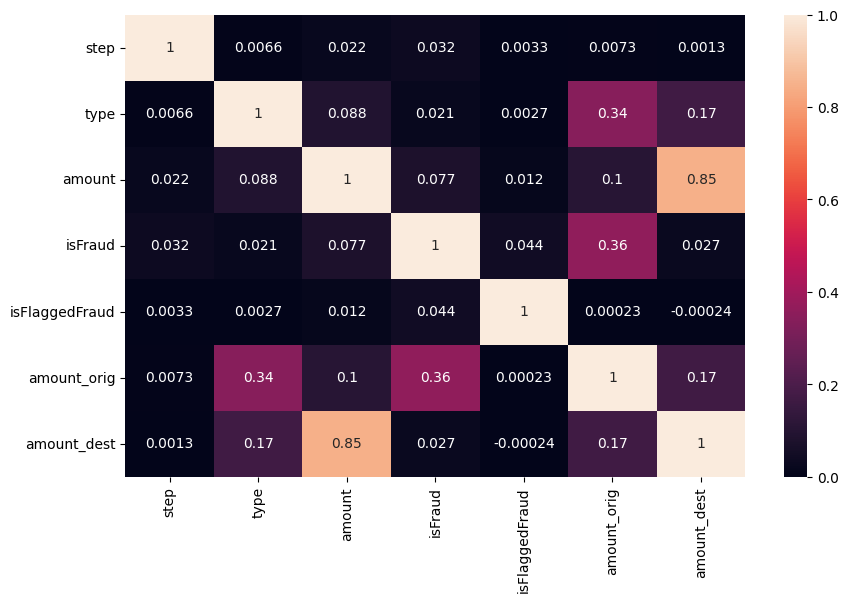

In [27]:
corr = new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [28]:
new_df.head()

,step,type,amount,isFraud,isFlaggedFraud,amount_orig,amount_dest
0,1,3,9839.64,0,0,9839.64,0.0
1,1,3,1864.28,0,0,1864.28,0.0
2,1,4,181.00,1,0,181.00,0.0
3,1,1,181.00,1,0,181.00,-21182.0
4,1,3,11668.14,0,0,11668.14,0.0


### model building


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [34]:
#perform scalling

scaler = StandardScaler()
new_df['Normalized_Amount'] = scaler.fit_transform(new_df['amount'].values.reshape(-1,1))

new_df['Normalized_step'] = scaler.fit_transform(new_df['step'].values.reshape(-1,1))

new_df['Normalized_type'] = scaler.fit_transform(new_df['type'].values.reshape(-1,1))

new_df['Normalized_Amount_orig'] = scaler.fit_transform(new_df['amount_orig'].values.reshape(-1,1))


new_df['Normalized_amount_dest'] = scaler.fit_transform(new_df['amount_dest'].values.reshape(-1,1))

new_df.drop(['step','amount','type','amount_orig','amount_dest'],inplace = True,axis=1)

new_df.head()


,isFraud,isFlaggedFraud,Normalized_Amount,Normalized_step,Normalized_type,Normalized_Amount_orig,Normalized_amount_dest
0,0,0,-0.281560,-1.703042,0.952399,0.211876,-0.152896
1,0,0,-0.294767,-1.703042,0.952399,0.157490,-0.152896
2,1,0,-0.297555,-1.703042,1.693076,0.146011,-0.152896
3,1,0,-0.297555,-1.703042,-0.528954,0.146011,-0.178952
4,0,0,-0.278532,-1.703042,0.952399,0.224345,-0.152896


### trai test split

In [35]:
y = new_df['isFraud']
x = new_df.drop(['isFraud'], axis=1)

(x_train , x_test ,y_train , y_test) = train_test_split(x,y,test_size=0.2,random_state=22) 

print('shape of x_train: ', x_train.shape)
print('shape of x_test: ', x_test.shape)

shape of x_train:  (5090096, 6)
shape of x_test:  (1272524, 6)


In [50]:
#logistic regression 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.001,penalty='l2')
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)
logic_regression_score = log_reg.score(x_test, y_test)*100
logic_regression_score

99.91230027881596

precision recall

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.37      0.52      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.69      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Logistic Regression:
[[1270795      86]
 [   1030     613]]


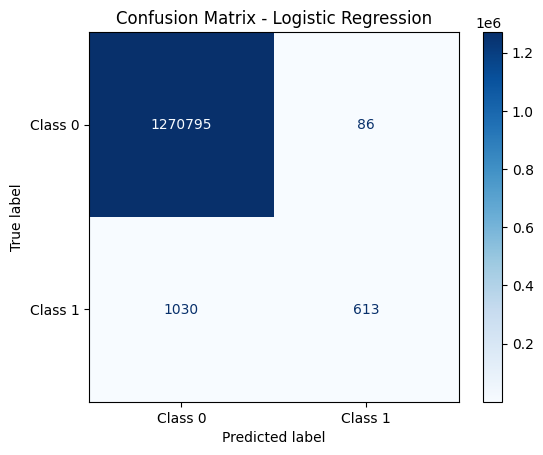

Precision Score: 0.88
Recall Score: 0.37


In [57]:
#classification report lr

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# Assuming y_test and y_pred are defined; y_pred should be binary predictions, not probabilities

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix_lr)

# Plot confusion matrix
metrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=['Class 0', 'Class 1'])
metrix.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Calculate precision and recall scores
precision_score_lr = precision_score(y_test, y_pred)
recall_score_lr = recall_score(y_test, y_pred)

print(f"Precision Score: {precision_score_lr:.2f}")
print(f"Recall Score: {recall_score_lr:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.62      0.76      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.81      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270870      11]
 [    620    1023]]


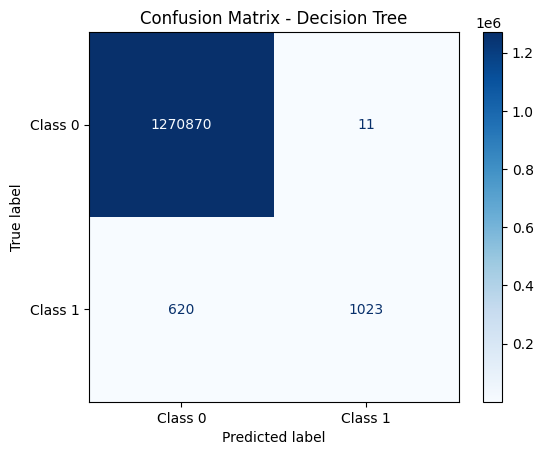

Precision Score: 0.99
Recall Score: 0.62


In [59]:
#  Decision Tree Classifier 
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)


decision_tree.fit(x_train, y_train)


y_pred = decision_tree.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])  # Adjust labels if needed
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")

Q5 What are the key factors that predict fraudulent customer?
Payment Method:The use of different or unusual payment methods that are not typical for the customer.and here we can specificaly see two types of payment methord where the faraud happend which was cashout and transfer 


Q6. Do these factors make sense? If yes, How? If not, How not?
Yes, these factors make sense for several reasons:
Cashout: If a customer’s behavior shifts suddenly towards frequent cashouts, especially large ones, it can be a sign of fraud. Cashouts are often used by fraudsters to convert digital funds into physical cash quickly.

Transfer: Large or frequent transfers, particularly to new or high-risk accounts, can be indicative of attempts to move stolen funds or launder money. Monitoring unusual transfer patterns can help identify suspicious activities.

Q7. What kind of prevention should be adopted while company update its infrastructure?
Monitoring and Alerts
    Implement Monitoring: Set up monitoring systems to continuously track the performance, security, and health of the updated infrastructure.
    Configure Alerts: Establish alerts for potential issues, such as unauthorized access attempts, performance degradation, or system errors.
Backup and Recovery
    Perform Backups: Ensure that complete backups of existing systems, applications, and data are performed before making any changes. This allows for restoration in case of failure.
    Test Recovery Procedures: Regularly test backup and recovery procedures to ensure data can be restored quickly and accurately if needed.

Incident Response Planning
    Develop an Incident Response Plan: Prepare a response plan for handling any issues that arise during or after the update. This should include procedures for identifying, containing, and resolving incidents.


Q8. Assuming these actions have been implemented, how would you determine if they work?
Validation Testing: Re-run functional, performance, and security tests in the updated environment to confirm that all systems are working as intended and that no new issues have been introduced.
Penetration Testing: Perform penetration testing or vulnerability assessments to identify any security weaknesses that may have been overlooked.
Disaster Recovery Drills: Test backup and recovery procedures to ensure that they work as expected and that data can be restored efficiently.
Surveys and Interviews: Conduct surveys or interviews with users and stakeholders to gather their experiences and opinions on the updated infrastructure.
User Experience Metrics: Measure user satisfaction and the impact of changes on productivity and efficiency.